# INTRODUCTION

I have carried out my investigation on the Titanic Dataset.

I was curious as to whether ones socio-economic status had a bearing on the liklihood of surviving the Titanic disaster. To understand this I first calculated the chances or probabilities, and used the concept of conditional probability to ascertain what the chances of survival of any random individual aboard the titanic were, given his/her socio-economic status.

I then procceded to run a chi-squared test to examine the significance of my findings. 

Note, given the absence of direct information relating to socio-economic status, I had to use the Passenger Class (Pclass) as a proxy. 

#### FIRST STEP

Importing relevant datasets and libraries.

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

titanic = pd.read_csv('titanic-data.csv')

In [79]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Demographics onboard the Titanic

This section describes various aspects pertaining to the passengers on board the titanic. These aspects include the number of male/female passengers, division of passengers by the port of embarkment etc.



Total number of passengers on board: 891

Total number of female passengers on board: 314

Total number of male passengers on board: 577




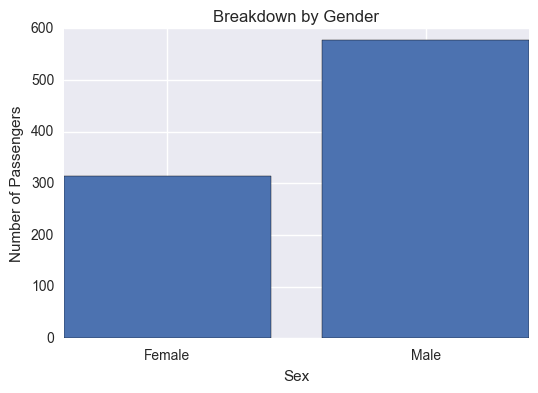

In [80]:
print 'Total number of passengers on board: ' + str(titanic.groupby('PassengerId').count()['Name'].sum())
print ''
print 'Total number of female passengers on board: ' + str(titanic.groupby(['Sex'])['Sex'].count().loc['female'])
print ''
print 'Total number of male passengers on board: ' + str(titanic.groupby(['Sex'])['Sex'].count().loc['male'])
print '\n'


gender = ['Female', 'Male']
passenger_c = [314, 577]

ind = np.arange(len(gender))

plt.bar(ind, passenger_c)
plt.xticks(ind + 0.4, gender)
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')
plt.title('Breakdown by Gender')

In [81]:
for t in [1, 2, 3]:
    a = titanic[titanic['Pclass'] == t]['Sex']

        
    print 'Number of female passengers belonging to Class ' + str(t) + ':', sum(a == 'female')
    print ''
    print 'Number of male passengers belonging to Class ' + str(t) + ':', sum(a == 'male')
    print ''
    print 'Proprtion of females belonging to Class ' + str(t) + ':', sum(a == 'female')/float(sum(a == 'female') + sum(a == 'male'))
    print '\n'


Number of female passengers belonging to Class 1: 94

Number of male passengers belonging to Class 1: 122

Proprtion of females belonging to Class 1: 0.435185185185


Number of female passengers belonging to Class 2: 76

Number of male passengers belonging to Class 2: 108

Proprtion of females belonging to Class 2: 0.413043478261


Number of female passengers belonging to Class 3: 144

Number of male passengers belonging to Class 3: 347

Proprtion of females belonging to Class 3: 0.293279022403




About 43.5% of the Class 1 passengers were female, about 41.3% of the Class 2 passengers were female, whereas only 29.3% of Class 3 passengers were female.

This might help explain why so many passengers belonging to Class 1 especially survived. There perhaps was a 'Women First' policy that was adopted during the Titanic evacuation. That let women escape death.

### Breakdown by Age

The average age of passengers aboard the Titanic was 30 years. The oldest passenger onboard was 80 years old, and the youngest was about 5 months old. There were 139 passengers who were below 18 years of age, and 26 passengers who were above 60 years of age.

##### Wrangling

There were missing values in the age column. To treat for this, I tried a couple of things: 

One (test), I calculated the average age of the passengers on whom the age data was available, and substituted the unavialable figures with this average.

Two (test2), I dropped all the unavailable data from my dataset.

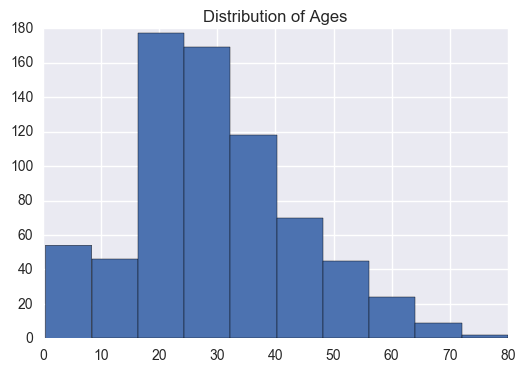

In [82]:
titanic['Age'].hist()
plt.title('Distribution of Ages')

In the first case, I found that my method of imputing values for NAs affected my distribution, and this ought to have an adverese impact on any inferences and conclusions I might reach

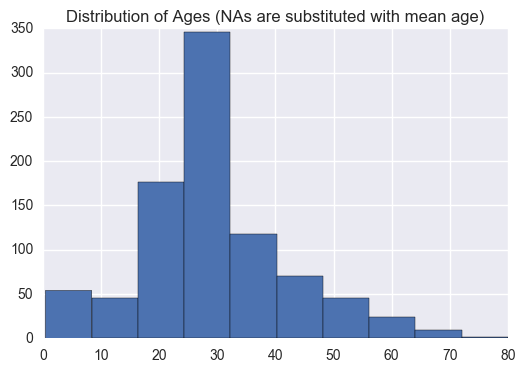

In [83]:
test = titanic['Age'].fillna(round(titanic.loc[:, 'Age'].mean()))
test.hist()
plt.title('Distribution of Ages (NAs are substituted with mean age)')

I adopted the second method of dropping NAs while operating on the Age variable, which did not alter the shape of my distribution

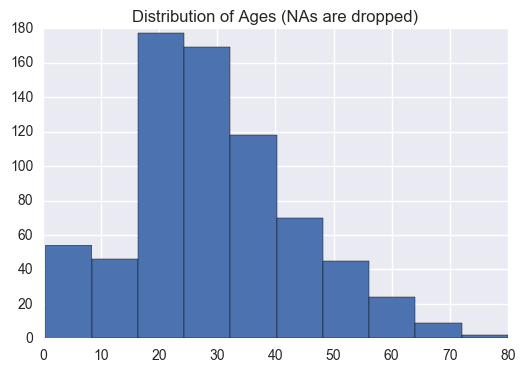

In [84]:
test2 = titanic['Age'].dropna()
test2.hist()
plt.title('Distribution of Ages (NAs are dropped)')

In [85]:
#Average ages

print 'The average age on the Titanic: ' + str(round(titanic.loc[:, 'Age'].mean()))
print ''
print 'The average age of females on the Titanic: ' + str(round(titanic.groupby('Sex').mean()['Age'].loc['female']))
print ''
print 'The average age of males on the Titanic: ' + str(round(titanic.groupby('Sex').mean()['Age'].loc['male']))

The average age on the Titanic: 30.0

The average age of females on the Titanic: 28.0

The average age of males on the Titanic: 31.0


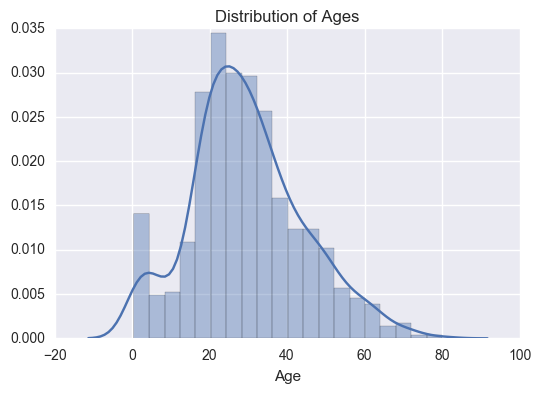

In [86]:
sns.distplot(test2)
plt.title('Distribution of Ages')

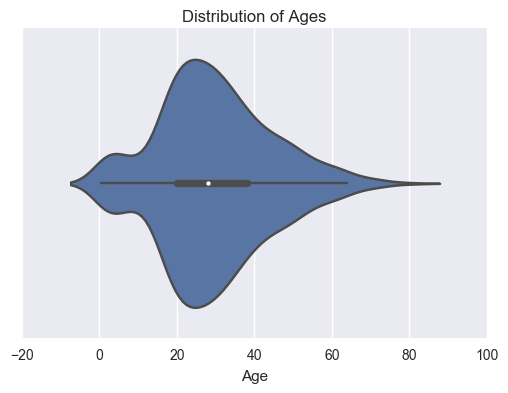

In [87]:
sns.violinplot(x = titanic['Age'])
plt.title('Distribution of Ages')

In [88]:
print 'Total number of childern and elderly aboard:', sum((titanic['Age'].dropna() <= 18) | (titanic['Age'].dropna() >= 60))

Total number of childern and elderly aboard: 165


In [89]:
#The oldest and youngest passengers onboard.
print 'Eldest person aboard the Titanic:', titanic.loc[:, 'Age'].dropna().max()
print 'Youngest person aboard the Titanic', titanic.loc[:, 'Age'].dropna().min()
print ''

print 'Children aboard the Titanic:', sum(titanic.loc[:, 'Age'].dropna() <= 18)
print 'Seniors aboard the titanic:', sum(titanic.loc[:, 'Age'].dropna() >= 60)

Eldest person aboard the Titanic: 80.0
Youngest person aboard the Titanic 0.42

Children aboard the Titanic: 139
Seniors aboard the titanic: 26


In [90]:
c = titanic[(titanic['Age'] <= 18) | (titanic['Age'] >= 60)]

for t in [1, 2, 3]:
    print 'Number of children and adults in Class' + str(t) + ':', c[c['Pclass'] == t]['PassengerId'].count()
    print 'Proportion of children and adults in Class' + str(t) + ':', c[c['Pclass'] == t]['PassengerId'].count()/float(titanic['PassengerId'].count())
    print '\n'

Number of children and adults in Class1: 33
Proportion of children and adults in Class1: 0.037037037037


Number of children and adults in Class2: 33
Proportion of children and adults in Class2: 0.037037037037


Number of children and adults in Class3: 99
Proportion of children and adults in Class3: 0.111111111111




We observe that nearly 37% of passengers belonging to Class 1 and Class 2 were either children or elderly, whereas Class 3 had children or elderly as merely 11% of its demographic respectively. Perhaps, this demographic was given a preference when it came to evacuation. This could explain why passengers belonging to the higher classes - Class 1 and Class 2 - had better chances of survival.

### Passengers by Port of Embarkment

There were three stops made by the Titanic to onboard passengers: Cherbourg, Queenstown and Southampton. 

About 3/4th (nearly 72%) of all passengers aboard the titanic go on at Southampton, followed by Cherbourg (nearly 19%) and Queenstown (nearly 9%)

Passenger breakdown by port of embarkment: 


Passengers embarked at Cherbourg: 168
Passengers embarked at Queenstown: 77
Passengers embarked at Southampton: 644


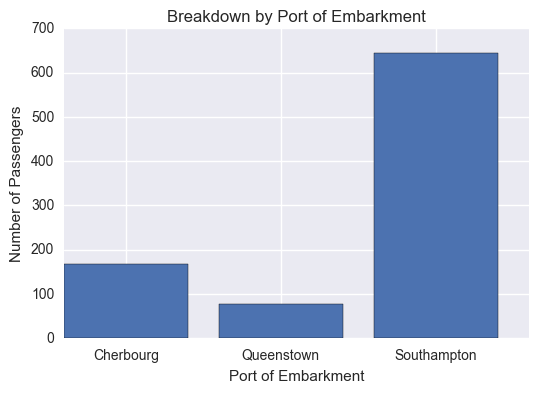

In [91]:
print 'Passenger breakdown by port of embarkment: ' 
print '\n'
print 'Passengers embarked at Cherbourg: ' + str(titanic.groupby('Embarked')['PassengerId'].count()['C'])
print 'Passengers embarked at Queenstown: ' + str(titanic.groupby('Embarked')['PassengerId'].count()['Q'])
print 'Passengers embarked at Southampton: ' + str(titanic.groupby('Embarked')['PassengerId'].count()['S'])


#Plotting the above
ports = ['Cherbourg', 'Queenstown', 'Southampton']
passenger_c = [168, 77, 644]

ind = np.arange(len(ports))

plt.bar(ind, passenger_c)
plt.xticks(ind + 0.4, ports)
plt.xlabel('Port of Embarkment')
plt.ylabel('Number of Passengers')
plt.title('Breakdown by Port of Embarkment')


Passenger breakdown by class of passenger: 


Pasengers belonging to Class 1: 216
Pasengers belonging to Class 2: 184
Pasengers belonging to Class 3: 491


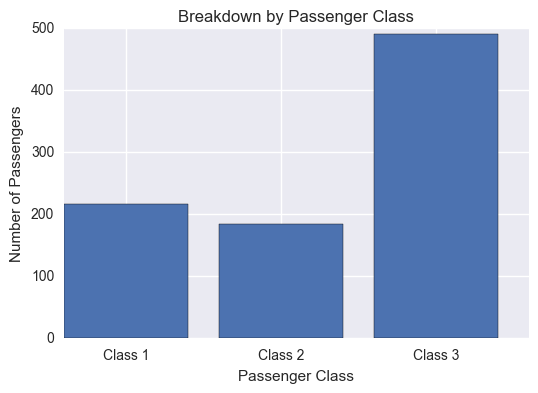

In [92]:
print 'Passenger breakdown by class of passenger: ' 
print '\n'
print 'Pasengers belonging to Class 1: '+ str(titanic.groupby('Pclass').size()[1])
print 'Pasengers belonging to Class 2: '+ str(titanic.groupby('Pclass').size()[2])
print 'Pasengers belonging to Class 3: '+ str(titanic.groupby('Pclass').size()[3])

status = ['Class 1', 'Class 2', 'Class 3']
passenger_c = [216, 184, 491]

ind = np.arange(len(status))

plt.bar(ind, passenger_c)
plt.xticks(ind + 0.4, status)
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.title('Breakdown by Passenger Class')

## Question: Given that a passenger survived, what was his/her socio-economic status?

To answer this question I have attempted to calculate probabilites using the naive definition of probability:

###### P(A) = # observations in A / # observations in the sample space.

Given this definition, I calculated probabilites that a passenger:
1. Survived [P(S)] or died [P(D)]; 
2. Belonged to the upper or class 1 [P(U)], middle or class 2 [P(M)], lower or class 3 [P(L)]
3. Belonged to a particular class and survived [P(S intersection U), P(S intersection M), P(S intersection L)]

I then calculated the conditional probability that a passenger belonged to a particular socio-economic class, given that the passenger survived via:

###### P(U/M/L | S) = P(U/M/L intersection S) / P(S)
       

Note: The data on the passenger class have been used as a proxy for the socio-economic class.

From the analysis below I arrived at the following conclusion:

Given that a passenger survived, there is a:

##### 1. 39.8 % chance that the survivor belonged to the high economic class or class1
##### 2. 25.5 % chance that the survivor belonged to the high economic class or class1
##### 3. 34.9 % chance that the survivor belonged to the high economic class or class1


Conversely, I also observed that given the socio economic class:

##### 1. There was a 63.2% chance that a class 1 passenger survived
##### 2. There was a 47.3% chance that a class 1 passenger survived
##### 3. There was a 24.3% chance that a class 1 passenger survived


This means that you were thrice as likely to survive the Titanic if you belonged to class 1 as opposed to class 2

In [93]:
#Defining a function to calculate and return the proability

def find_p(value):
    return round(value / 891.0, 3)

In [94]:
#Calculating the probability that any given passenger survived/died.

by_survival = titanic.groupby('Survived').size()

p_survived = find_p(by_survival[1])
p_died = find_p(by_survival[0])

print '\n'
print 'The probability that a passenger survived: ' + str(p_survived)
print 'The probability that a passenger survived: ' + str(p_died)



The probability that a passenger survived: 0.384
The probability that a passenger survived: 0.616


In [95]:
#Finding the probability that a passenger belongs to a certain economic class.

by_class = titanic.groupby('Pclass').size()

p_class1 = find_p(by_class[1])
p_class2 = find_p(by_class[2]) 
p_class3 = find_p(by_class[3])


In [96]:
#Defining a procedure to return the number of survivors from each passenger class.

def intersection_count(passenger_class):
    intersection = titanic[titanic['Pclass']==passenger_class]['Survived'].sum()
    return intersection

In [97]:
#Calculating the number of survivors from each passenger class.u

for passenger_class in [1, 2, 3]:
    print 'The number of survivors from passenger class {}: '.format(passenger_class) + str(intersection_count(passenger_class))

#Claculating the probability 
p_class1_intersection_live = find_p(intersection_count(1))
p_class2_intersection_live = find_p(intersection_count(2))
p_class3_intersection_live = find_p(intersection_count(3))


The number of survivors from passenger class 1: 136
The number of survivors from passenger class 2: 87
The number of survivors from passenger class 3: 119


In [98]:
#Conditional probability: Class given survivor

p_class1_given_survival = p_class1_intersection_live / p_survived
print 'Probability that the survivor belongs to class 1: ' + str(round(p_class1_given_survival, 3))

p_class2_given_survival = p_class2_intersection_live / p_survived
print 'Probability that the survivor belongs to class 2: ' + str(round(p_class2_given_survival, 3))

p_class3_given_survival = p_class3_intersection_live / p_survived
print 'Probability that the survivor belongs to class 3: ' + str(round(p_class3_given_survival, 3))




Probability that the survivor belongs to class 1: 0.398
Probability that the survivor belongs to class 2: 0.255
Probability that the survivor belongs to class 3: 0.349


In [99]:
#Conditional probability: Survival given class

p_s_c1 = p_class1_intersection_live / p_class1
print 'Prabability that a Class 1 pasenger survives: ' + str(round(p_s_c1, 3))

p_s_c2 = p_class2_intersection_live / p_class2
print 'Prabability that a Class 2 pasenger survives: ' + str(round(p_s_c2, 3))

p_s_c3 = p_class3_intersection_live / p_class3
print 'Prabability that a Class 3 pasenger survives: ' + str(round(p_s_c3, 3))

Prabability that a Class 1 pasenger survives: 0.632
Prabability that a Class 2 pasenger survives: 0.473
Prabability that a Class 3 pasenger survives: 0.243


## Question: Did the socio-economic class have a statisitcally significant impact in determining whether a passenger lived or died?

To answer the above question, I look at the data on the passenger class and survival. We then administer a chi-squared test for independence to see whether the socio-economic status did have a bearing on the chances of survival, or whether the two variables were independent.

It is prudent to administer a chi-squared test because we are dealing with categorical variables.

We begin by hypothesizing:

###### H0: The two variables - passenger class and survival - are independent.
###### H1: The two variables - passenger class and survival - are not independent.

We will be testing the hypothesis for a significance level (alpha) of 0.05.

To continue, we will have to examine our observed and expected values.

We calculate the expected values like so:

###### Expected = (Row Total * Column Total) / Sample Size

In our case, the observed values and the expected values are as follows:

In [100]:
observed_values = {'1': pd.Series([136, 80], index = ['Alive', 'Dead']),
                  '2': pd.Series([87, 97], index = ['Alive', 'Dead']),
                  '3': pd.Series([119, 372], index = ['Alive', 'Dead']),}

expected_observations = {'1': pd.Series([82.91, 133.09], index = ['Alive', 'Dead']),
                        '2': pd.Series([70.63, 113.37], index = ['Alive', 'Dead']),
                        '3': pd.Series([188.46, 302.54], index = ['Alive', 'Dead']),}

observed_values = pd.DataFrame(observed_values)
expected_observations = pd.DataFrame(expected_observations)

print 'Observed Values:'
print observed_values.head()
print '\n'

print 'Expected Values:'
print expected_observations.head()


Observed Values:
         1   2    3
Alive  136  87  119
Dead    80  97  372


Expected Values:
            1       2       3
Alive   82.91   70.63  188.46
Dead   133.09  113.37  302.54


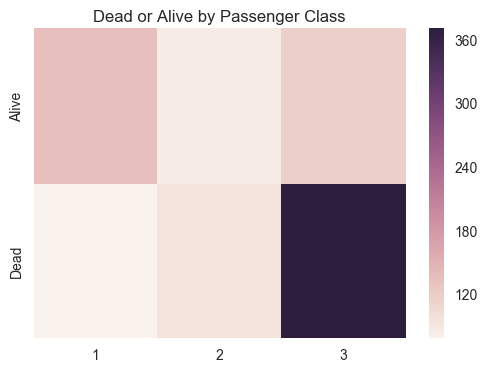

In [101]:
sns.heatmap(observed_values)
plt.title('Dead or Alive by Passenger Class')

We calculate the Chi-Squared as follows:

##### x = (Observed Value - Expected Value)^2 / (Expected Value)

##### Chi-Squared = the sum of x over all observations. 

In [102]:
x = (observed_values - expected_observations)**2 / expected_observations
print x
print '\n'

chi_squared = x.sum().sum()

print chi_squared


               1         2          3
Alive  33.995273  3.794095  25.600613
Dead   21.177760  2.363737  15.947285


102.878763628


Next we calculate the degrees of freedom (df). We calculate this like so:

##### df = (number of rows - 1) * (number of columns - 1)

In our case the degrees of freedom:

df = (2 - 1) * (3 - 1) = 2

The p-value for a Chi-Squared of 102.878 with 2 degrees of freedom is less than 0.0001. Since p < 0.05 (alpha), we can REJECT THE NULL HYPOTHESIS and concluded that the two variables are not independent. 

And that the socio-economic class of passenger did have an impact on their survival.


## CONCLUSIONS

In my analysis, I found that passengers belonging to a higher class had a higher chance of surviving the titanic. I used conditional probability to establish this.

On digging deeper, I found that the higher classes - Class 1 and Class 2 - had a higher proportion of women, children and elderly amongst its populace. This partly can explain the better chances of survival in the demographic. 

These findings are not conclusive or 100% accurate. I used the passenger class as a proxy for socio-economic status, and had to drop missing values whenever I was opearting on the Age variable. This dataset atleast in part depended on information gathered from the survivors and may have made it prone to Survivorship Bias. It is prudent to take note of these caveats.

However, I ran a chi-square test for independence to round off my analysis, and concluded that the variables socio-economic class and survival are not independent. That, the socio-economic status of an individual did have some bearing on her chances of survival.




### REFERENCES


1. Documentation: Matplotlib, NumPy, Pandas
2. http://graphpad.com/quickcalcs/pValue2/
3. http://inspire.stat.ucla.edu/unit_13/index.php
4. Udacity: Inferential Statistics
5. https://onlinecourses.science.psu.edu/stat500/node/56
6. https://www.wikiwand.com/en/Survivorship_bias